Loding important libraries

In [1]:
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

Loading image data

In [2]:
#Loading Data:
categories = ['cat', 'dog']
final_path = os.path.join('train_pic')
input_data = []
target = []
for img in os.listdir(final_path):
    img_array = cv2.imread(os.path.join(final_path, img))
    img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (150, 150))
    input_data.append(img_resized.flatten())
    category_name = img[:3]
    target.append(categories.index(category_name))

input_data = np.array(input_data)
target = np.array(target)

## Note: Only the 1000 individual images are loaded for each class; this is done of reduce data loading time and model fit time

In [3]:
print(input_data.shape)
print(target.shape)

(2000, 67500)
(2000,)


## Vizualizing few data

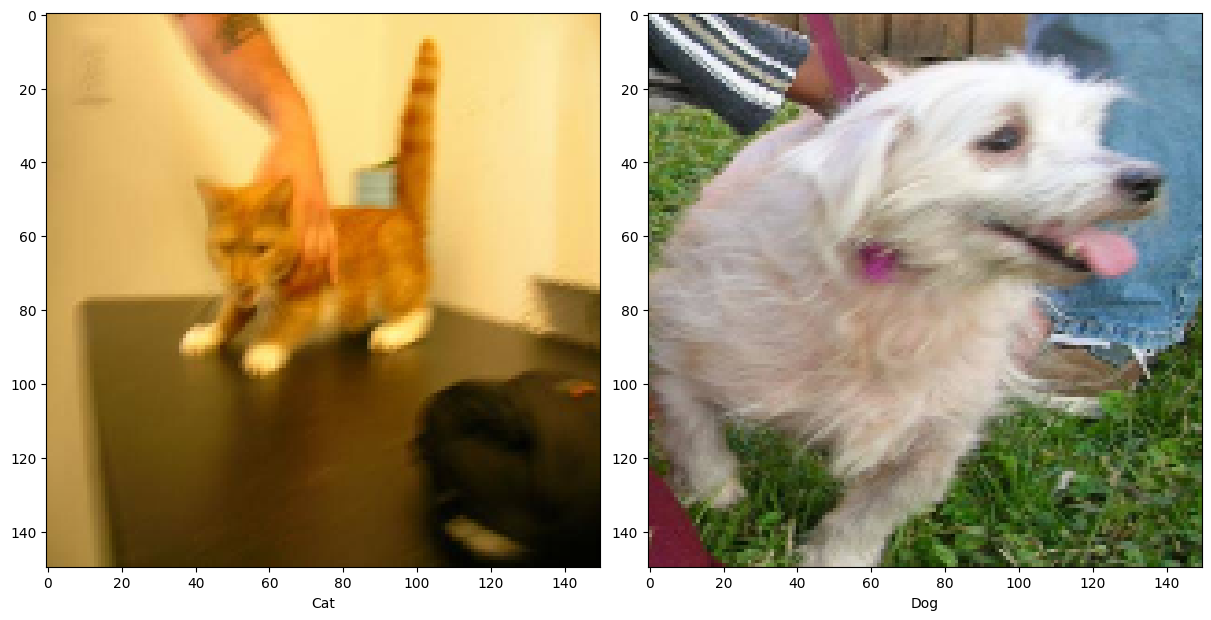

In [4]:
fig,(ax1,ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 7))

ax1.imshow(input_data[0].reshape(150,150,3))
ax1.set_xlabel('Cat')

ax2.imshow(input_data[-1].reshape(150,150,3))
ax2.set_xlabel('Dog')

plt.show()

Creating Dataframe

In [5]:
#Creating dataframe:
df = pd.DataFrame(input_data)
df['Target'] = target # cat -> 0 and dog ->1
df.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,203,164,87,208,169,92,209,170,93,212,...,2,2,0,2,2,0,2,2,0,0
1,8,8,8,8,8,8,8,8,8,8,...,18,9,8,17,10,8,19,8,8,0
2,144,121,69,138,115,63,141,118,66,136,...,185,161,156,197,147,159,197,144,162,0
3,58,60,57,59,61,58,62,64,61,61,...,36,35,30,33,32,28,24,19,16,0
4,246,240,212,250,247,226,247,248,231,246,...,115,83,74,109,82,68,106,80,56,0


In [6]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
1995,253,255,252,253,253,253,252,248,249,253,...,129,113,115,124,107,109,131,115,116,1
1996,245,238,228,246,239,229,247,240,230,248,...,254,254,254,254,254,254,254,254,254,1
1997,118,138,158,143,152,164,131,126,151,133,...,218,181,189,210,175,182,224,184,190,1
1998,178,178,178,178,178,178,178,178,178,178,...,161,103,19,161,103,19,161,103,19,1
1999,203,212,210,244,249,252,244,247,255,98,...,83,112,56,113,138,87,93,115,69,1


In [7]:
#Input and output data for creating model:
#input data  
X=df.iloc[:,:-1]  
#output data 
y=df.iloc[:,-1]

### Train test split of the data

In [8]:
#Train, Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 

## Creating SVM Model 
Here, C is the error penalty term
and polynomial kernel is used. 
Different kernel, and gamma value can be used but it might increase the model fit time

In [9]:
#Creating SVM Model:
svc=svm.SVC(C=10,kernel='poly',degree=3,gamma=0.001,probability=True)

#Fitting the model with training data
svc.fit(X_train,y_train)

SVC(C=10, gamma=0.001, kernel='poly', probability=True)

## Predicting with test data

In [10]:
# # Testing the model using the testing data 
y_pred = svc.predict(X_test) 
  
# # Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 
  
# # Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 56.00000000000001% accurate


### Accuracy is low because of low data set used and to minimize time required for the model to fit

In [11]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.56      0.60      0.58       200
         dog       0.57      0.52      0.54       200

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.56      0.56       400



## Testing with Images

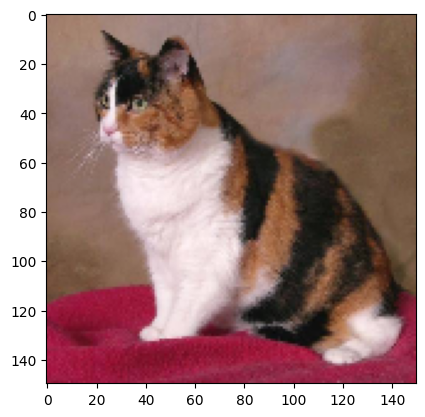

cat = 64.58772259952171%
dog = 35.412277400478295%
The predicted image is : cat


In [20]:
path='test/cat.jpg'
img=cv2.imread(path) 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (150, 150))
plt.imshow(img_resized) 
plt.show() 
l=[img_resized.flatten()] 
probability=svc.predict_proba(l) 
for ind,val in enumerate(categories): 
	print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[svc.predict(l)[0]])

### The above picture is predicted as cat with 64.5 % accuracy

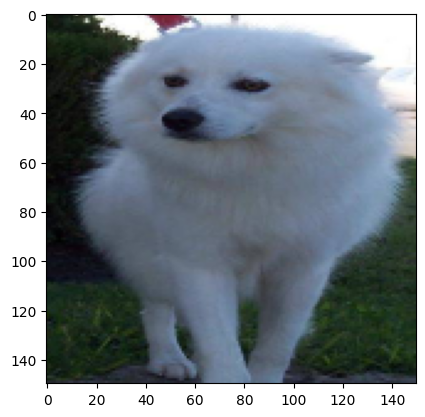

cat = 45.72165670850423%
dog = 54.278343291495766%
The predicted image is : dog


In [19]:
path='test/dog.jpg'
img=cv2.imread(path) 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (150, 150))
plt.imshow(img_resized) 
plt.show() 
l=[img_resized.flatten()] 
probability=svc.predict_proba(l) 
for ind,val in enumerate(categories): 
	print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[svc.predict(l)[0]])

### The above picture is of dog with 54.27% accuracy

# In conclusion, the SVM algorithm from sklearn library is used to classify images of cat and dog.

## Note: Accuracy is low because of the smaller dataset used and the algorithm in place